In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/My Drive/aalap-qlora-out-mask/checkpoint-1324'  # 🔁 update this path
base_model_name = 'mistralai/Mistral-7B-Instruct-v0.2'  # 🔁 or whatever your base model is

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from peft import PeftModel
import torch

# Load model + adapter (LoRA)
tokenizer = AutoTokenizer.from_pretrained(base_model_name)
base_model = AutoModelForCausalLM.from_pretrained(base_model_name, torch_dtype=torch.float16, device_map="auto")
model = PeftModel.from_pretrained(base_model, model_path)

# Create pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, device_map="auto")


Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
!pip install fastapi uvicorn pyngrok
!pip install -U langchain-google-genai
!pip install -qU langchain-tavily
!pip install langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 36.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.5 which is incompatible.
google-generativeai 0.8.5 requires google-ai-

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 29.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 3.0.3 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
  Using cached langchain_core-1.0.5-py3-none-any.whl.metadata (3.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.5 MB/s eta 0:00:00
Using cached langchain_core-1.0.5-py3-none-any.whl (471 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled lang

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    google_api_key = "api_key"
    # other params...
)


In [ ]:
from langchain_tavily import TavilySearch

# Ensure TAVILY_API_KEY is set as an environment variable or replace '<YOUR_TAVILY_API_KEY>' with your actual key.
# For example: os.environ["TAVILY_API_KEY"] = "<YOUR_TAVILY_API_KEY>"

tavily = TavilySearch(
    max_results=2,
    topic="general",
    tavily_api_key = "api_key"# Correctly pass the API key
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)


In [ ]:
llm.invoke("Hello")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--054efa46-e0e2-4aa8-9705-692d4eb53172-0', usage_metadata={'input_tokens': 2, 'output_tokens': 36, 'total_tokens': 38, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 27}})

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import requests
import json
import textwrap # Added import for textwrap

class WorkflowState(TypedDict):
    query: str
    is_legal_query: bool
    model_response: str
    similar_cases: str
    final_response: str
    error: str



def classifier_node(state: WorkflowState) -> WorkflowState:
    query = state["query"]

    prompt = f"""
    You are a legal query classifier. Determine if the following query is related to legal matters,
    law, legal advice, court cases, legal procedures, or legal questions.

    Query: {query}

    Respond with ONLY "YES" or "NO".
    """

    try:
        result = llm.invoke(prompt)
        is_legal = "YES" in result.content.upper()

        return {**state, "is_legal_query": is_legal}

    except Exception as e:
        return {**state, "is_legal_query": False, "error": f"Classification error: {str(e)}"}


def route_after_classification(state: WorkflowState) -> str:
    return "model_response" if state.get("is_legal_query", False) else "non_legal_response"


def non_legal_response_node(state: WorkflowState) -> WorkflowState:
    return {
        **state,
        "final_response": "⚖️ Please ask legal-related questions only. I'm specialized in legal assistance and case law lookup..."
    }

def model_response_node(state: WorkflowState) -> WorkflowState:
    prompt = state["query"]

    try:
        # Direct model invocation (same as your FastAPI route)
        result = pipe(prompt, max_new_tokens=256)

        # HuggingFace pipeline returns a list of dicts
        model_output = result[0]["generated_text"]

        return {**state, "model_response": model_output}

    except Exception as e:
        return {**state, "model_response": "", "error": f"model pipe error: {e}"}

def hallucination_check_node(state: WorkflowState) -> WorkflowState:
    model_answer = state.get("model_response", "")
    query = state.get("query", "")

    # --------- 1. RELAXED + ACCURATE VALIDATION FOR INDIAN LAW ---------
    # This does NOT require IPC/CrPC references for something like DV Act.
    verification_prompt = f"""
    You are a legal validator.

    Determine whether the following answer is STRICTLY based on INDIAN LAW.

    Answer is VALID if:
    - It refers to ANY Indian statute (e.g., DV Act 2005, IPC, CrPC, Evidence Act)
    - OR it clearly describes Indian courts, Magistrate, District Court, High Court, Supreme Court
    - OR it uses Indian legal terminology
    - OR it reflects Indian legal procedures
    - AND it does NOT mention foreign legal systems like US, UK, EU, Canada, Australia, etc.

    DO NOT mark INVALID just because:
    - It does not mention Articles of Constitution
    - It does not mention IPC/CrPC
    - It is short
    - It lacks case law citations

    INVALID if:
    - There is ANY reference to foreign jurisdictions
    - The content is legally incorrect for India
    - It mentions foreign courts, foreign acts, foreign laws

    Reply EXACTLY with one word:
    VALID
    or
    INVALID

    Answer to check:
    {model_answer}
    """

    try:
        verdict = llm.invoke(verification_prompt).content.strip().upper()

        # If VALID, keep the original answer
        if verdict == "VALID":
            return state

        # --------- 2. REGENERATE corrected Indian-law answer ---------
        regeneration_prompt = f"""
        You are a legal expert specializing ONLY in INDIAN LAW.

        Rewrite a complete, accurate legal answer based ONLY on Indian law.

        STRICT RULES:
        - Do NOT include the question text.
        - Do NOT include instructions.
        - Do NOT mention foreign jurisdictions.
        - Use Indian statutes, courts, and procedures.
        - Give a full, complete explanation.
        - Must NOT be truncated.
        - Keep the tone formal and legal.

        Wrap ONLY the final answer in the following format:

        <answer>
        (Write the complete Indian-law answer here)
        </answer>

        Topic: {query}
        """

        regenerated = pipe(
            regeneration_prompt,
            max_new_tokens=600,
            truncation=False,
            do_sample=False
        )[0]["generated_text"]

        # --------- 3. Extract clean answer only ---------
        import re
        match = re.search(r"<answer>([\s\S]*?)</answer>", regenerated)

        if match:
            cleaned_answer = match.group(1).strip()
        else:
            cleaned_answer = regenerated.strip()

        # --------- 4. RE-VERIFY the regenerated answer ---------
        recheck_prompt = f"""
        Check if the following answer is strictly based on INDIAN LAW.

        Mark VALID unless:
        - It mentions US, UK, EU, Canada, Australia or foreign courts
        - It references foreign statutes
        - It gives non-Indian legal reasoning

        Answer:
        {cleaned_answer}

        Reply EXACTLY: VALID or INVALID
        """

        final_verdict = llm.invoke(recheck_prompt).content.strip().upper()

        if final_verdict == "VALID":
            return {**state, "model_response": cleaned_answer}

        # --------- 5. Final fallback (very rare) ---------
        fallback = (
            "⚠️ Unable to produce a verified India-specific legal answer. "
            "Please rephrase your question with more context about Indian law."
        )
        return {**state, "model_response": fallback}

    except Exception as e:
        return {**state, "error": f'Hallucination check error: {e}'}


def tavily_search_node(state: WorkflowState) -> WorkflowState:
    query = state["query"]
    model_response = state.get("model_response", "")


    # Combine query + model output if needed
    search_query = f"{query} legal case law precedent realted to India"

    try:
        # Create the Tavily tool call
        tool_call = {
            "args": {"query": search_query},
            "id": "tavily_search_1",
            "name": "tavily",
            "type": "tool_call",
        }

        # Invoke the tool
        result = tavily.invoke(tool_call)

        # The tool returns a ToolMessage object, whose content is a JSON string
        search_results = result.content
        print(search_results)

        return {**state, "similar_cases": search_results}

    except Exception as e:
        return {
            **state,
            "similar_cases": "",
            "error": f"Tavily search error: {e}"
        }



def final_response_node(state: WorkflowState) -> WorkflowState:
    model_answer = state.get("model_response", "")
    similar_cases_raw = state.get("similar_cases", "") # Get the raw string

    similar_cases = []
    if similar_cases_raw:
        try:
            # Parse the JSON string into a Python object
            parsed_results = json.loads(similar_cases_raw)
            # Assuming 'results' key contains the list of cases
            if 'results' in parsed_results and isinstance(parsed_results['results'], list):
                similar_cases = parsed_results['results']
            # If there's no 'results' key, but the top level is a list, use that.
            elif isinstance(parsed_results, list):
                similar_cases = parsed_results
        except json.JSONDecodeError as e:
            print(f"Error decoding similar_cases JSON: {e}")
            similar_cases = []

    final_message = "### 🧑‍⚖️ Legal Assistant Response\n"

    # Add line breaks to the model_answer for readability
    if model_answer:
        wrapped_model_answer = ""
        paragraphs = model_answer.split('\n\n') # Split by double newlines for paragraphs
        for para in paragraphs:
            wrapped_model_answer += textwrap.fill(para, width=80) + '\n\n' # Wrap each paragraph
        wrapped_model_answer = wrapped_model_answer.strip() # Remove trailing newlines

        final_message += f"\n**Model Answer:**\n{wrapped_model_answer}\n"
    else:
        final_message += f"\n**Model Answer:**\nNo response from model.\n"


    if similar_cases:
        final_message += "\n### 🔍 Similar Case Law Found:\n"
        for case in similar_cases:
            # Now 'case' is expected to be a dictionary
            final_message += f"- **{case.get('title', 'Unknown Case')}**: {case.get('url', '')}\n"

    return {**state, "final_response": final_message}

In [ ]:
workflow = StateGraph(WorkflowState)

workflow.add_node("classifier", classifier_node)
workflow.add_node("non_legal_response", non_legal_response_node)
workflow.add_node("model_response", model_response_node)
workflow.add_node("hallucination_check", hallucination_check_node)
workflow.add_node("tavily_search", tavily_search_node)
workflow.add_node("final_response", final_response_node)

workflow.set_entry_point("classifier")

workflow.add_conditional_edges(
    "classifier",
    route_after_classification,
    {
        "model_response": "model_response",
        "non_legal_response": "non_legal_response"
    }
)

workflow.add_edge("model_response", "hallucination_check")
workflow.add_edge("hallucination_check", "tavily_search")
workflow.add_edge("tavily_search", "final_response")
workflow.add_edge("non_legal_response", END)
workflow.add_edge("final_response", END)

graph = workflow.compile()

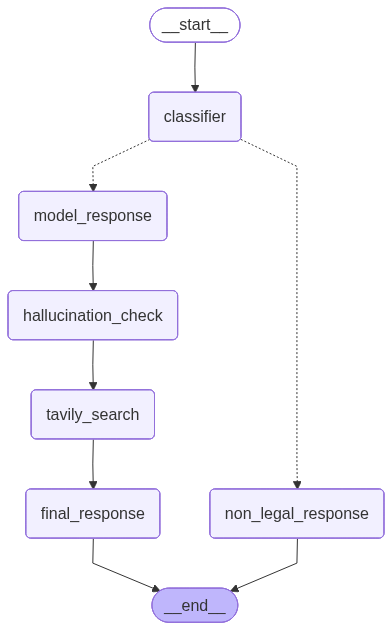

In [ ]:
from IPython.display import Markdown, display

mermaid_diagram = graph.get_graph().draw_mermaid_png()
# display(Markdown(f"```mermaid\n{mermaid_diagram}\n```"))
display(Image(mermaid_diagram)) # This line caused the error

In [ ]:
from fastapi import FastAPI, Request
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import threading

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # or ["http://localhost:3000"] for safety
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)



In [ ]:
from pydantic import BaseModel

class ChatRequest(BaseModel):
    prompt: str
    max_new_tokens: int = 128   # keep for compatibility (not used in graph)

@app.post("/chat")
async def chat(request: ChatRequest):
    # Prepare initial workflow state
    initial_state = {
        "query": request.prompt
    }

    # Run the workflow
    result = await graph.ainvoke(initial_state)

    # Extract final response from workflow state
    final_output = result.get("final_response", "")

    return {"response": final_output}


In [ ]:
from pyngrok import ngrok
import nest_asyncio

ngrok.set_auth_token("your_api_key")


In [ ]:
!pkill -f uvicorn || echo "no old uvicorn processes"


^C


In [ ]:
# Create a public URL

ngrok.kill()
public_url = ngrok.connect(8000).public_url
print(f"Public API URL: {public_url}/chat")

# Run the server
nest_asyncio.apply()
def run_server():
    uvicorn.run(app, host="0.0.0.0", port=8000)

threading.Thread(target=run_server).start()


Public API URL: https://glucosidal-enlargedly-theola.ngrok-free.dev/chat


In [ ]:
graph.invoke({"query": "Tell me about Domestic abuse act"})

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


{"query": "Tell me about Domestic abuse act legal case law precedent realted to India", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.casemine.com/search/in/domestic%2Babuse%2Bcases", "title": "domestic+abuse+cases | Indian Case Law | Law - CaseMine", "content": "there is no absolute bar for the parties to the domestic violence cases to file application invoking Section 482 Cr.P.C. where there is absolute abuse of", "score": 0.9998287, "raw_content": null}, {"url": "https://ijrpr.com/uploads/V6ISSUE7/IJRPR50851.pdf", "title": "[PDF] Domestic Violence and its Legal Remedies in India - ijrpr", "content": "In contrast to previous criminal provisions that mostly concentrated on punishment, this act represents a turning point in India's legal history because it offers victims of domestic abuse a full civil remedy that includes protection, residency, maintenance, and custody rights..3 In contrast to other legal remedies under the Indian Penal Cod

{'query': 'Tell me about Domestic abuse act',
 'is_legal_query': True,
 'model_response': '⚠️ Unable to produce a verified India-specific legal answer. Please rephrase your question with more context about Indian law.',
 'similar_cases': '{"query": "Tell me about Domestic abuse act legal case law precedent realted to India", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.casemine.com/search/in/domestic%2Babuse%2Bcases", "title": "domestic+abuse+cases | Indian Case Law | Law - CaseMine", "content": "there is no absolute bar for the parties to the domestic violence cases to file application invoking Section 482 Cr.P.C. where there is absolute abuse of", "score": 0.9998287, "raw_content": null}, {"url": "https://ijrpr.com/uploads/V6ISSUE7/IJRPR50851.pdf", "title": "[PDF] Domestic Violence and its Legal Remedies in India - ijrpr", "content": "In contrast to previous criminal provisions that mostly concentrated on punishment, this act represents 